In [1]:
import torch
import numpy as np
import gymnasium as gym

import sys
sys.path.append('../../..')
from tools.trainer import Trainer
from tools.logger import Logger
from environments.hockey_wrapper import HockeyWrapper
from TD3 import TD3Agent

In [2]:
env_string = "Hockey"

In [16]:
if env_string == "Hockey":
    env = HockeyWrapper(mode="normal", opponent="weak")
else:
    env = gym.make(env_string)

In [4]:
agent = TD3Agent(env.observation_space, env.action_space)
trainer = Trainer()

In [17]:
ep_rewards = trainer.train(env, agent, n_episodes=30000, test_every=100, noise=0.4)

Step 101/30000:
                    test reward: -1.40
                    mean reward: -11.88, max reward: 9.88
                    Avg. step count: 170.2, Avg ep duration: 0.043s
                    Avg. critic loss: 0.19, Avg. actor loss: 5.53
                    Avg. train duration: 0.120s
                    winrate: 0.05, drawrate 0.95, lossrate 0.00
            
Step 201/30000:
                    test reward: -0.08
                    mean reward: -17.55, max reward: 8.69
                    Avg. step count: 188.9, Avg ep duration: 0.046s
                    Avg. critic loss: 0.20, Avg. actor loss: 5.74
                    Avg. train duration: 0.116s
                    winrate: 0.05, drawrate 0.95, lossrate 0.00
            
Step 301/30000:
                    test reward: 0.24
                    mean reward: -12.00, max reward: 9.95
                    Avg. step count: 177.2, Avg ep duration: 0.043s
                    Avg. critic loss: 0.20, Avg. actor loss: 6.10
          

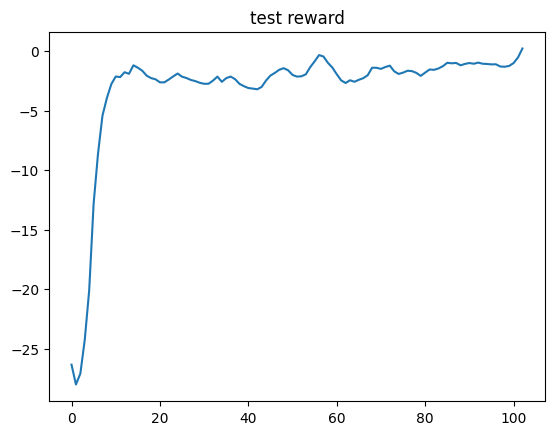

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

In [12]:
trainer.logger.plot()

In [13]:
def play(env_string, agent, n_episodes=10, noise=0):
    if env_string == 'Hockey':
        env = HockeyWrapper(mode='attack', opponent='weak')
        render = True
    else:
        env = gym.make(env_string, render_mode='human')
        render = False
    steps, rewards, observations, actions, results = Trainer.run(env, agent, n_episodes=n_episodes, noise=noise, render=True, store_transitions=False, hockey=env_string=='Hockey')
    env.close()
    return steps, rewards, observations, actions, results

In [15]:
steps, rewards, observations, actions, results = play(env_string, agent, n_episodes=5, noise=0)
print(np.mean(rewards))

-1.9746841482341524


In [ ]:
trainer.logger.save("logs/pendulum_td3.npy")

In [ ]:
# torch.save(agent.state(), 'checkpoint_hockey.pth')

In [ ]:
# agent_state = torch.load('checkpoint_hockey.pth')
# agent.restore_state(agent_state)